In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)


In [2]:
print(sys.path)

['/Users/maringirard/Dev/ACL/Working', '/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python311.zip', '/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11', '/usr/local/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/lib-dynload', '', '/usr/local/lib/python3.11/site-packages', '/Users/maringirard/Dev/ACL/core', '/Users/maringirard/Dev/ACL/utils', '/Users/maringirard/Dev/ACL']


In [3]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image


In [4]:
# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import time_evo
from core.schmidt_solve import compute_schmidt_states
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse
from utils.collapse import collapse_gif
from utils.display_gif import display_gif

In [12]:
# Setting parameters for simulation TODO make a config file for this.

d1 = 10; d2 = 200; E_spacing = 1.0; E_int = 0.06; E_int2 = 0; E_env = 1; E_env2 = 0; w = [0,0,0,np.sqrt(0.3),0,0,0,np.sqrt(0.7),0,0]; envi=[0]; tmax = 15; ind_nb = 100; log = 0

# Running the simulation and running the core functions
result, tlist, H_list, ket_list = time_evo(d1,d2,E_spacing, E_int, E_int2, E_env, E_env2,w,envi, tmax, ind_nb,log)
eigen = eig(H_list)
s_list = compute_schmidt_states_all_time(result, ind_nb)

10
10


In [13]:
gif_path = collapse_gif(eigen, s_list,ind_nb)

display_gif(gif_path)


/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


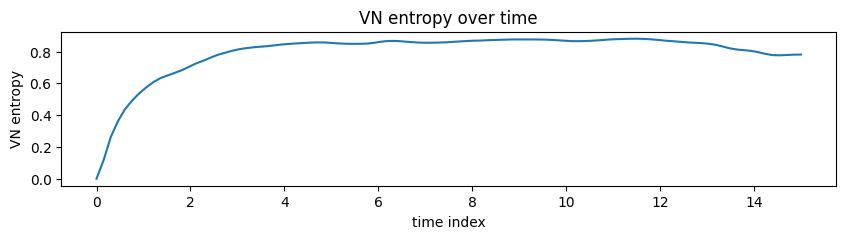

In [14]:
plot_VN(result,tlist,log=0)

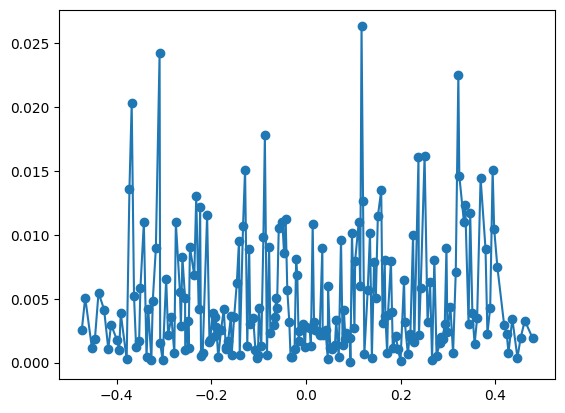

In [8]:

eigenenergies_system_2, eigenstates_system_2 = H_list[7].eigenstates() 
eigenenergies_system_total, eigenstates_system_total = H_list[1].eigenstates() 
eigenenergies_system_1, eigenstates_system_1 = H_list[6].eigenstates() 

# Plot 2: Distribution of the Environment state over the environment energy eigenstates
time_index = 10  # Define the time index
s0 = compute_schmidt_states(result, time_index, 1)[0]
schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_2]
plt.plot(eigenenergies_system_2, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_2}')

    


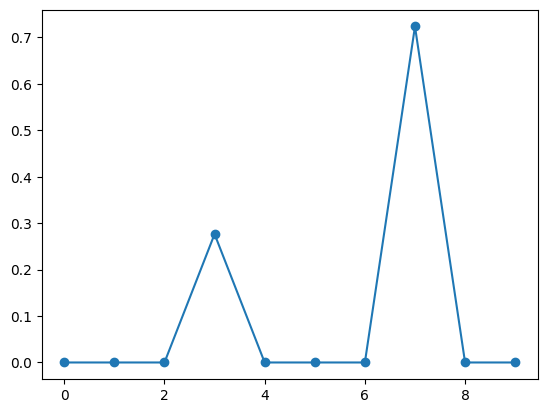

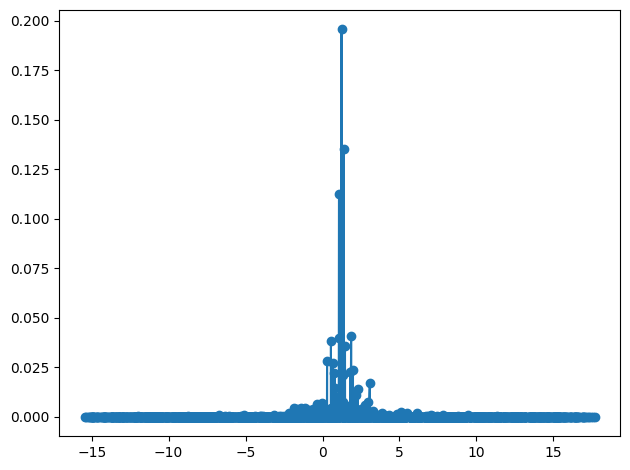

In [10]:
    # Plot 3: Distribution of the System state over the system energy eigenstates
    s0 = compute_schmidt_states(result, time_index, 0)[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_1]
    plt.plot(eigenenergies_system_1, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_1}')
    #axes[1, 0].set_title("Distribution of the System state over the system energy eigenstates")
    #axes[1, 0].set_xlabel("Energy Eigenstates")
    #axes[1, 0].set_ylabel("Schmidt Coefficients")
    plt.show()
    # Plot 4: Distribution of the state over the energy eigenstates
    s0 = result.states[0]
    schmidt_coefficients0 = [abs(np.vdot(s0, eigenstate)) ** 2 for eigenstate in eigenstates_system_total]
    plt.plot(eigenenergies_system_total, schmidt_coefficients0, marker='o', label=f'Energy {eigenenergies_system_total}')
    #axes[1, 1].set_title("Distribution of the state over the energy eigenstates")
    #axes[1, 1].set_xlabel("Energy Eigenstates")
    #axes[1, 1].set_ylabel("Schmidt Coefficients")
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()